<a href="https://colab.research.google.com/github/alexvecchiettini/image-processing/blob/main/DataProcessingNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Part 2: Image Classification - Buildings or Forest

## Pre-Processing of Data

The dataset is located on a google drive. Linked below:

https://drive.google.com/drive/folders/1jeQKTWGEZfmM0qo0YwLfX6t4QVaP1-PP?usp=sharing

NOTE: Link will be taken down once course is over for the sake of space on my google drive

In [1]:
# Importing packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Loading the dataset
train_buildings = "/content/drive/MyDrive/Data/seg_train/seg_train/buildings"
train_forest = "/content/drive/MyDrive/Data/seg_train/seg_train/forest"
test_buildings = "/content/drive/MyDrive/Data/seg_test/seg_test/buildings"
test_forest = "/content/drive/MyDrive/Data/seg_test/seg_test/forest"
image_size = 128


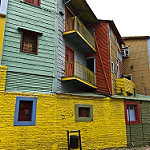

In [2]:
# Image of a Building
Image.open("/content/drive/MyDrive/Data/seg_train/seg_train/buildings/4.jpg")

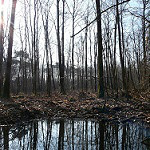

In [3]:
# Image of a Forest
Image.open("/content/drive/MyDrive/Data/seg_train/seg_train/forest/23.jpg")

(150, 150)


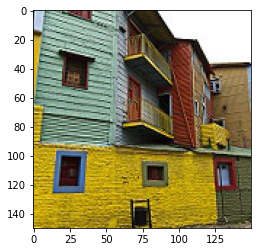

In [4]:
#test image of a building with plt

tim = Image.open('/content/drive/MyDrive/Data/seg_train/seg_train/buildings/4.jpg')
print(tim.size)
plt.imshow(tim)

In [5]:
# for i in tqdm(os.listdir(train_forest)): 
#     path = os.path.join(train_forest, i)
#     img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
#     img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
#     np_img2 = np.asarray(img2)

# for i in tqdm(os.listdir(train_buildings)): 
#     path = os.path.join(train_buildings, i)
#     img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
#     img = cv2.resize(img, (image_size, image_size)).flatten() 
#     np_img = np.asarray(img)

# # NOTE: even though cv2 is correctly reading in grayscale,
# #       cmap must be set to gray because of how plt displays single-channel images
# #       "This is not an OpenCV issue, but simply the representation matplotlib uses."
# #       The grayscale image values are being interpreted by plt as a colourmap

# plt.figure(figsize=(10,10))
# plt.subplot(1, 2, 1)
# plt.imshow(np_img2.reshape(image_size, image_size),cmap="gray")
# # plt.axis('off')
# plt.subplot(1, 2, 2)
# plt.imshow(np_img.reshape(image_size, image_size), cmap="gray")
# # plt.axis('off')
# plt.title("Buildings and Forest in GrayScale")

In [6]:
# Extracting features from each photo
def train_data():
    train_data_buildings = [] 
    train_data_forest = []
    for i in tqdm(os.listdir(train_buildings)): 
        # load each image (i) and convert to grayscale
        path = os.path.join(train_buildings, i)
        img_i = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        # resizing the data
        img_i = cv2.resize(img_i, (image_size, image_size))
        # put each processed image into the empty list defined above
        train_data_buildings.append(img_i) 
    # now do the same for each test forest image (j)
    for j in tqdm(os.listdir(train_forest)): 
        path = os.path.join(train_forest, j)
        img_j = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img_j = cv2.resize(img_j, (image_size, image_size))
        train_data_forest.append(img_j)
    
    train_data = np.concatenate((np.asarray(train_data_buildings),np.asarray(train_data_forest)),axis=0)
    return train_data

In [7]:
# Extracting features from each photo
def test_data():
    test_data_buildings = [] 
    test_data_forest = []
    for i in tqdm(os.listdir(test_buildings)): 
        # load each image (i) and convert to grayscale
        path = os.path.join(test_buildings, i)
        img_i = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        # resizing the data
        img_i = cv2.resize(img_i, (image_size, image_size))
        # put each processed image into the empty list defined above
        test_data_buildings.append(img_i) 
    # now do the same for each test forest image (j)
    for j in tqdm(os.listdir(test_forest)): 
        path = os.path.join(test_forest, j)
        img_j = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img_j = cv2.resize(img_j, (image_size, image_size))
        test_data_forest.append(img_j)
    
    test_data = np.concatenate((np.asarray(test_data_buildings),np.asarray(test_data_forest)),axis=0) 
    return test_data

In [10]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 474/474 [00:05<00:00, 81.40it/s] 


In [11]:
x_data = np.concatenate((train_data,test_data), axis = 0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [12]:
z1 = np.zeros(2191)
o1 = np.ones(2271)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(437)
o = np.ones(474)
Y_test = np.concatenate((o, z), axis=0)

In [13]:
y_data = np.concatenate((Y_train,Y_test), axis = 0).reshape(x_data.shape[0],1)

In [14]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (5373, 128, 128)
Y shape:  (5373, 1)


In [15]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state = 42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
num_px = x_train.shape[2]

In [16]:
print(x_train.shape)
print(x_test.shape)
print(number_of_train)
print(number_of_test)
print(num_px)

(4567, 128, 128)
(806, 128, 128)
4567
806
128


In [17]:
# Reshaping the training and test set.
# We are flattening the dimensionality of number_of_train and number_of_test into a multiplication of 1th and 2nd indicies
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test, x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (4567, 16384)
X test flatten (806, 16384)


In [18]:
# transposing
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T

# averages the pixels to normalize
x_train = x_train/255.0      
x_test = x_test/255

#now we can see its ready to be fed into sklearn algos
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 4567)
x test:  (16384, 806)
y train:  (1, 4567)
y test:  (1, 806)


## A. Logistic Regression Algorithm

In [19]:
# Initializing parameters
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

# Helper functions
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

# Forward and Backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

# Optimization
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

# Predict function
def predict(w,b,x_test):
    
    m = x_test.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(x_test.shape[0], 1)
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# Merge all functions into a model
def model(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    w = parameters["weight"]
    b = parameters["bias"]
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))
    
    d = {"costs": cost_list,
         "Y_prediction_test": y_prediction_test, 
         "Y_prediction_train" : y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Cost after iteration 0: 0.680490
Cost after iteration 100: 0.678182
Cost after iteration 200: 0.676719
Cost after iteration 300: 0.675761
Cost after iteration 400: 0.675106
Cost after iteration 500: 0.674631
Cost after iteration 600: 0.674265
Cost after iteration 700: 0.673962
Cost after iteration 800: 0.673699
Cost after iteration 900: 0.673458
Cost after iteration 1000: 0.673231
Cost after iteration 1100: 0.673012
Cost after iteration 1200: 0.672799
Cost after iteration 1300: 0.672589
Cost after iteration 1400: 0.672381


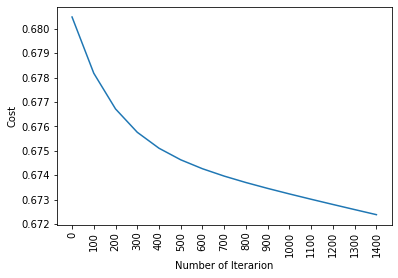

Test Accuracy: 68.36 %
Train Accuracy: 67.22 %


In [20]:
# Main model
d = model(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

In [21]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression = LogisticRegression(random_state = 42)
log_reg_cv = GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']},))

In [22]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
accuracy:  0.7543144650466429


In [23]:
# Accuracy of the LogisticRegression model
log_reg = LogisticRegression(C=10,penalty="l2",random_state = 42)
log_reg_model = log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg_model.score(x_test.T, y_test.T)))

test accuracy: 0.7667493796526055 


In [26]:
y_pred = log_reg_model.predict(x_test.T)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.T, y_pred)

array([[300,  87],
       [101, 318]])

## B. Random Forest Classifier

In [32]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42)
random_forest_model = random_forest.fit(x_train.T,y_train.T)

In [23]:
# Accuracy of the RandomForestClassifier
print("test accuracy: {} ".format(random_forest_model.score(x_test.T, y_test.T)))

test accuracy: 0.8225806451612904 


In [33]:
y_pred = random_forest_model.predict(x_test.T)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.T, y_pred)

array([[325,  62],
       [ 81, 338]])